<a href="https://colab.research.google.com/github/mayankbhati6055/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Mayank_Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mayank Bhati


# **Project Summary -**

Because of the lockdown that was implemented in response to the CoVid-19 pandemic, people were forced to live inside their homes, and the livelihood of almost every segment of society was negatively impacted.

As Twitter is one of the most popular platforms for social media expression, the goal of our analysis was to determine peoples' attitudes from their tweets.

**APPROACH:**

Text Preprocessing

Exploratory Data Analysis

Feature Engineering & Pre-Preprocessing

Model Training

**ALGORITHMS USED**:

Logistic Regression with Grid Search CV

Decision Tree Classifier(Count Vector and TF ID Vectorization techniques).

KNN(Count Vector and TF ID Vectorization techniques).

SVM Classifier (Count Vector and TF ID Vectorization techniques).

Multinomial Navies Bayes & Bernoulli Navies Bayes(Count Vector and TF ID Vectorization techniques).

Random Forest(Count Vector and TF ID Vectorization techniques).

Stochastic Gradient Descent(Count Vector and TF ID Vectorization techniques).



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then.The names and usernames have been given codes to avoid any privacy concerns.
We are given the following information:
1. Location
2. TweetAt
3. Original Tweet
4. Sentiment
5. User Name
6. Screen Name



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
database= "/content/drive/MyDrive/almabetter/coronavirus tweet sentiment alaysis/Coronavirus Tweets.csv"
df=pd.read_csv(database , encoding = 'latin')


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

In [8]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=41157, step=1)

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [13]:
# Visualizing the missing values
df.isnull().sum().sort_values(ascending= False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

### What did you know about your dataset?

There are six columns in this dataset: 'Location', 'UserName', 'ScreenName', 'Tweetat', 'OriginalTweet', 'Sentiment', and 'Location', which has a duplicate value of 8590 and may require action as we move forward with our classification machine learning project.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description

Answer Here
Answer Here

UserName: This column contains the username of the person who posted the tweet.

ScreenName: This column contains the screen name or handle of the user who posted the tweet.

Location: This column contains the location of the user who posted the tweet. This could be their city, state, country, or any other geographic location that they have specified in their Twitter profile.

TweetAt: This column contains the date and time when the tweet was posted.

OriginalTweet: This column contains the actual text of the tweet that was posted.

Sentiment: This column contains the sentiment label assigned to the tweet. This label could be positive, negative,extremely positive,extremely negative neutral, depending on the sentiment analysis algorithm used to classify the tweet.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [17]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [18]:
df.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:

# Chart - 1 visualization code
# Count the number of occurrences of each sentiment value in the 'Sentiment' column of the 'tweet' DataFrame and reset the index
sentiment_num = df['Sentiment'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame to 'Sentiment' and 'count', respectively
sentiment_num.columns = ['Sentiment','count']
sentiment_num

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

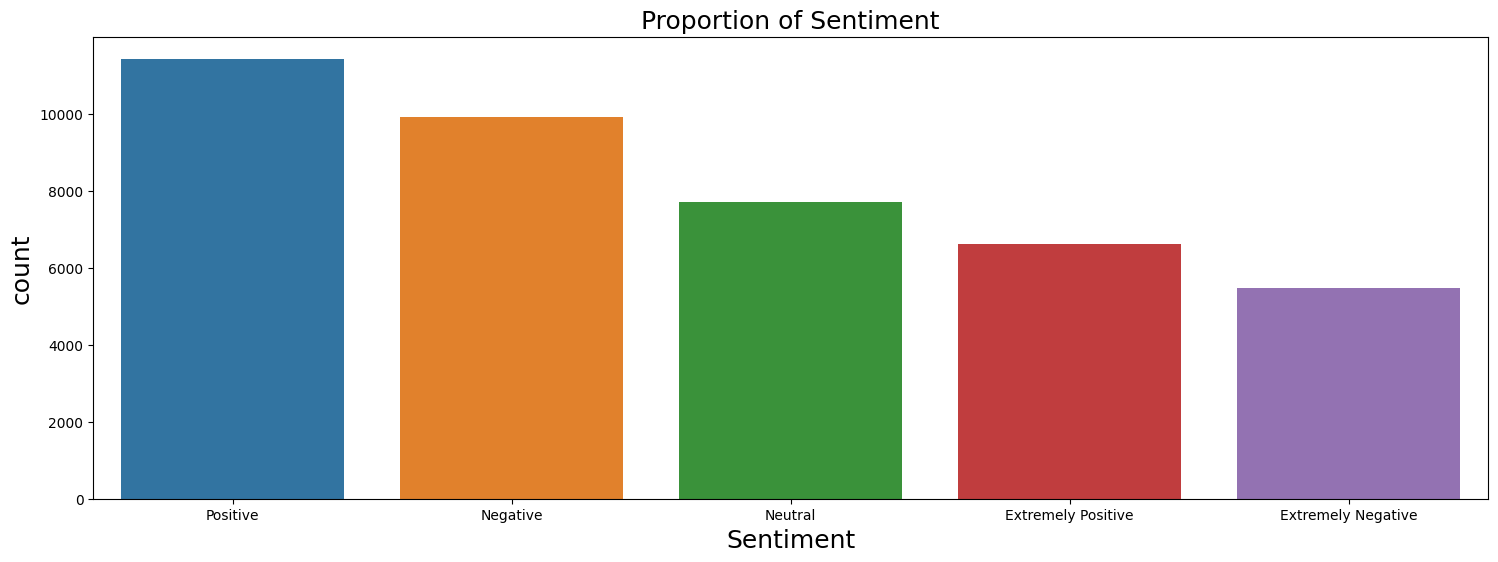

In [20]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_num)
ax.set_title("Proportion of Sentiment", fontsize=18)
ax.set_xlabel("Sentiment", fontsize=18)
ax.set_ylabel('count', fontsize=18)

In [21]:
# Replacing values
replace_1 = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_1)

In [22]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


##### 1. Why did you pick the specific chart?

**The number of tweets for each sentiment category can be effectively displayed using a bar chart in a clear and concise manner. A bar can be used to represent each sentiment category, with the height of the bar representing the number of tweets for that sentiment category.**

##### 2. What is/are the insight(s) found from the chart?

**Positive Sentiment is high as compared to the Negative, Neutral Sentiment.**

#### Chart - 2

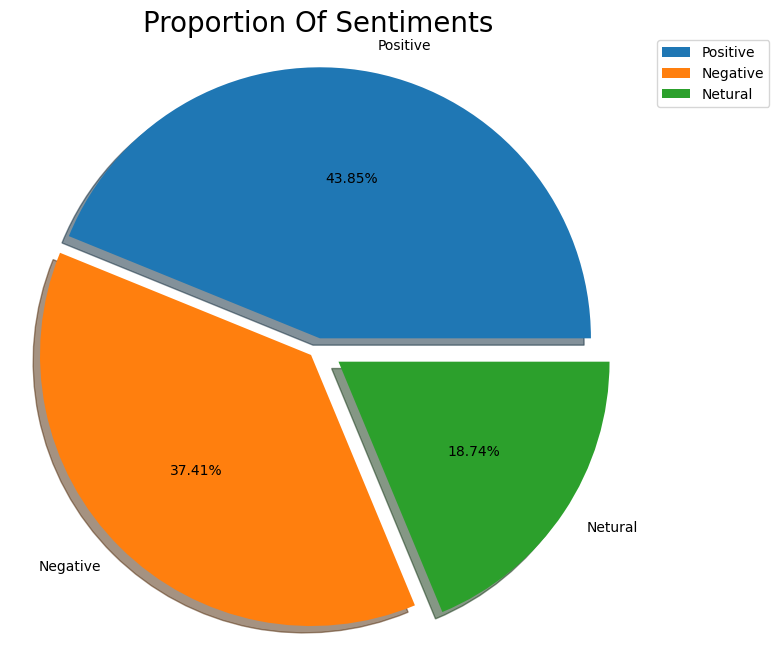

In [23]:
# Chart - 2 visualization code
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

**Pie charts are helpful for comparing categories quickly and easily and for illustrating the relative sizes of various categories.The set of tweets in this instance serves as the entire set of data, and the different sentiment categories (positive, negative, and neutral) serve as the parts.**

##### 2. What is/are the insight(s) found from the chart?

***Positive Sentiment is in High Proportion as 43.85% as compared to negative and netural i.e 18.74% and 37.41%.***

#### Chart - 3

In [24]:
# Chart - 3 visualization code
#Top 10 most frequently occurring locations from the 'Location' column of the tweet DataFrame.
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [25]:
Top_Location_Of_tweet

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [26]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'London, England'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Washington, DC'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Los Angeles, CA'),
 Text(7, 0, 'India'),
 Text(8, 0, 'UK'),
 Text(9, 0, 'Australia')]

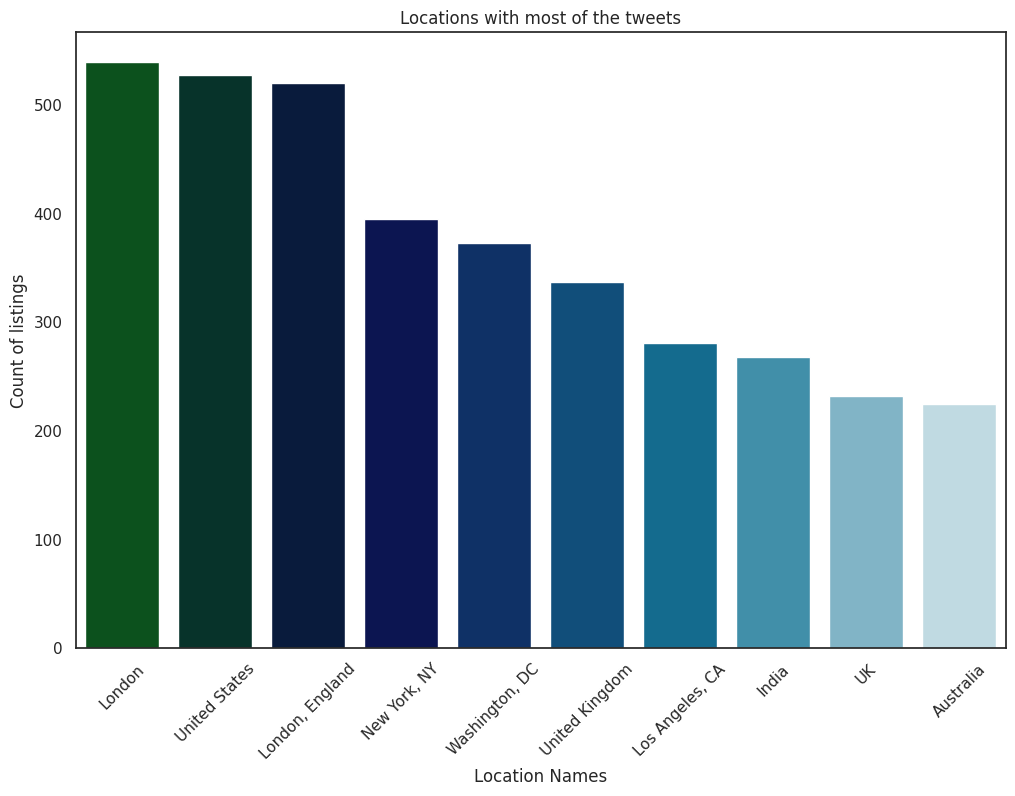

In [27]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='ocean')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### 1. Why did you pick the specific chart?

**The best option for visualising this data is a bar chart. The number of tweets sent from each location can be effectively displayed using a bar chart in a clear and concise manner. A bar can be used to represent each location, with the height of the bar corresponding to the number of tweets sent from that location.**

##### 2. What is/are the insight(s) found from the chart?


City **London** has Highest tweet comapred to other city tweet.

#### Chart - 4

In [28]:

# Chart - 4 visualization code
#calculates the length (number of characters) of each tweet and stores the result in the text_length column.
df['text_length'] = df['OriginalTweet'].apply(len)

In [29]:
tweet_character_length=df['text_length'].sort_values(ascending=False)

In [30]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)

# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)

# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)

In [31]:
top_tweet_character_length

,Original_Tweet_Row,tweet_character_Count
0,25160,355
1,7483,350
2,29688,341
3,17811,340
4,27346,338
...,...,...
41152,15577,12
41153,16872,11
41154,35526,11
41155,20467,11


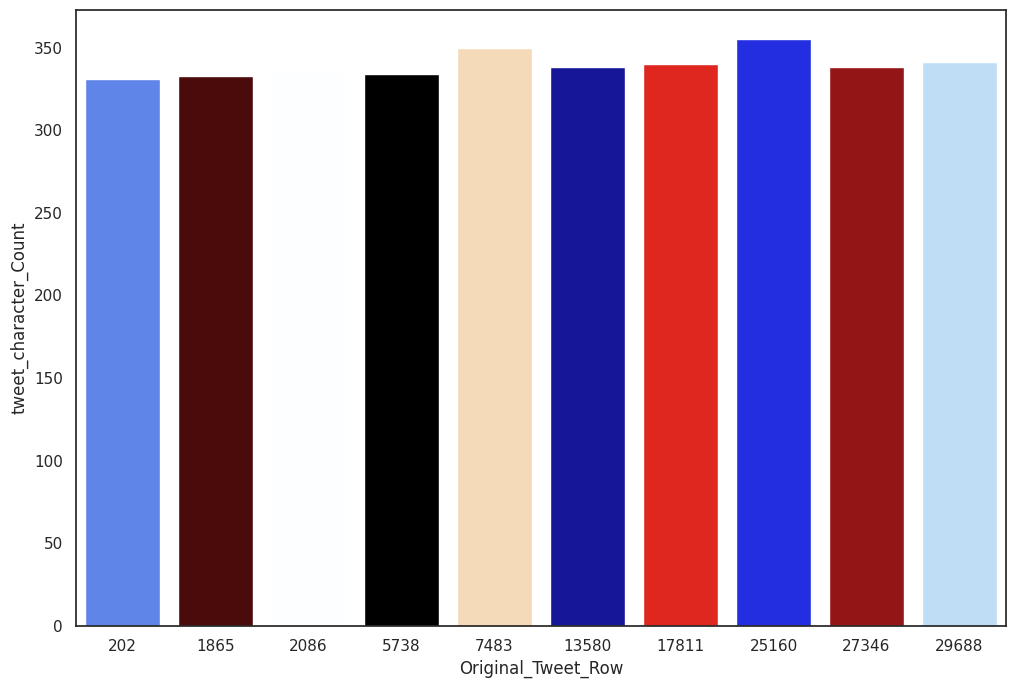

In [32]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='flag')

##### 1. Why did you pick the specific chart?

**The best option for visualising this data is a bar chart. The Original_Tweet_Row from each location can be clearly and succinctly displayed using a bar chart. A bar can be used to represent each location, with the height of the bar serving as a measure of the tweet_character_Count.**

##### 2. What is/are the insight(s) found from the chart?

**Row Number 25160 has highest Tweet length of character i.e 350**

#### Chart - 5

In [33]:
# Display the 15 most frequent dates by tallying the number of tweets sent on each distinct date in the "TweetAt" column of "tweet."
df['TweetAt'].value_counts().head(15)

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
Name: TweetAt, dtype: int64

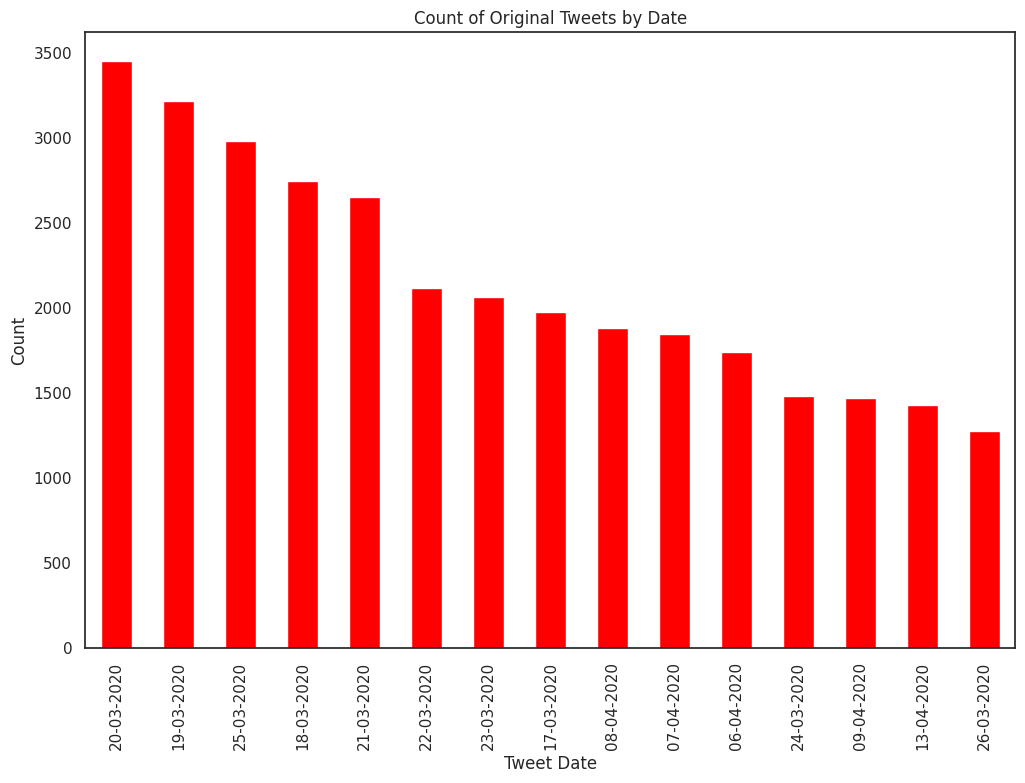

In [34]:
import pandas as pd
import plotly.express as px
# plot the original tweet column as a bar plot
df['TweetAt'].value_counts().head(15).plot(kind='bar',color='red')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()

##### 1. Why did you pick the specific chart?

**The bar plot is a typical and frequently used chart type for representing categorical data, such as dates or categories, where each category has a discrete count or frequency.**


##### 2. What is/are the insight(s) found from the chart?

**Dated 20 March ,2020 has highest number of tweet i.e 3448.**

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
text_length         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**We can see that the location column in this example has null values of 8590, and generally speaking, we do not use the location column in machine learning models for sentiment analysis.**

### 2. Handling Outliers

In [36]:
# Handling Outliers & Outlier treatments
print(df[['OriginalTweet', 'Sentiment']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Because we did not use any columns with continuous data (numerical data) as dependent or independent columns during the model training, we did not treat or handle outliers.**

## 5. **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [37]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
import regex as re
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [40]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)


**Which text normalization technique have you used and why?**

**Answer Here**.

Here we use both Stemming & Lemmatization normalization technique because Stemming  technique of reducing words to their root form and Lemmatization is another technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used both technique as proper text form and later used for classfication modelling .

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [42]:
# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
df["Clean_Tweets"] = df['OriginalTweet'].apply(transform_text)


In [43]:
 # Access the 'OriginalTweet' value in the row with integer in `tweet`
 df.iloc[25160]["OriginalTweet"]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [44]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length,Clean_Tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,menyrbie chrisitv http http http
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310,ready go supermarket covid19 outbreak paranoid...


In [45]:
# Create a new column in `tweet` called 'temp_list'
df['fillin_list'] = df['Clean_Tweets'].apply(lambda x:str(x).split())

In [46]:
df['fillin_list']

0                   [menyrbie, chrisitv, http, http, http]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid19, outbreak, pa...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, relate...
41154    [know, getting, tough, kameronwilds, rationing...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, rift, going, amazon, rn, alt...
Name: fillin_list, Length: 41157, dtype: object

In [47]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in df['fillin_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')


In [48]:
top_words

,Common_words,count
0,http,23986
1,coronavirus,18045
2,price,8936
3,store,8165
4,supermarket,7737
5,food,7221
6,grocery,6739
7,people,5563
8,amp,5197
9,consumer,5133


In [49]:

# Create a new DataFrame with the name "neutral" that only contains the "Clean_Tweets" column
# from the tweet table and has the "Sentiment" column set to "Neutral," "positive," or "negative.

neutral=pd.DataFrame(df[['Clean_Tweets']] [df['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(df[['Clean_Tweets']] [df['Sentiment'] == 'Positive'])
negative=pd.DataFrame(df[['Clean_Tweets']] [df['Sentiment'] == 'Negative'])



In [50]:
positive

,Clean_Tweets
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please panic enough food ...
5,news first confirmed case came sullivan county...
6,cashier grocery store sharing insight prove cr...
...,...
41146,gold price rose high today due coronavirus inc...
41148,uv light sterilizer sanitizer mask mobile phon...
41150,never situation amp world going supermarket pi...
41151,mrsilverscott definitely man feel like fall ne...


In [51]:
negative

,Clean_Tweets
4,ready go supermarket covid19 outbreak paranoid...
9,corona prevention stop buy thing cash use onli...
20,100 nation inficted covid 19 world must play f...
24,10downingstreet grantshapps done ensure food e...
26,preparation higher demand potential food short...
...,...
41133,singaporean politician slammed woman snapped s...
41147,really shitting much home covid19 coronavirus ...
41149,still shocked number toronto supermarket emplo...
41153,response complaint provided citing related del...


In [52]:
neutral

,Clean_Tweets
0,menyrbie chrisitv http http http
7,supermarket today buy toilet paper rebel toile...
10,month crowding supermarket restaurant however ...
16,13 http
17,eyeonthearctic 16mar20 russia consumer surveil...
...,...
41141,coronavirus narendramodi atcard stayhome lockd...
41143,http 5gtowers ecuadorunido cruiseships savethe...
41144,gamzap npr supermarket nearby getting
41152,airline pilot offering stock supermarket shelf...


In [53]:
pip install wordcloud

In [54]:
# Create an empty list called `spam_body`
spam_body = []

# Iterate over each row in a DataFrame called `df` where the 'Sentiment' column has the value 'Neutral'
for msg in df[df['Sentiment'] =='Neutral']['Clean_Tweets'].tolist():

  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():

       # Append each word to the `spam_body` list
        spam_body.append(word)


In [55]:
top_words

,Common_words,count
0,http,23986
1,coronavirus,18045
2,price,8936
3,store,8165
4,supermarket,7737
5,food,7221
6,grocery,6739
7,people,5563
8,amp,5197
9,consumer,5133


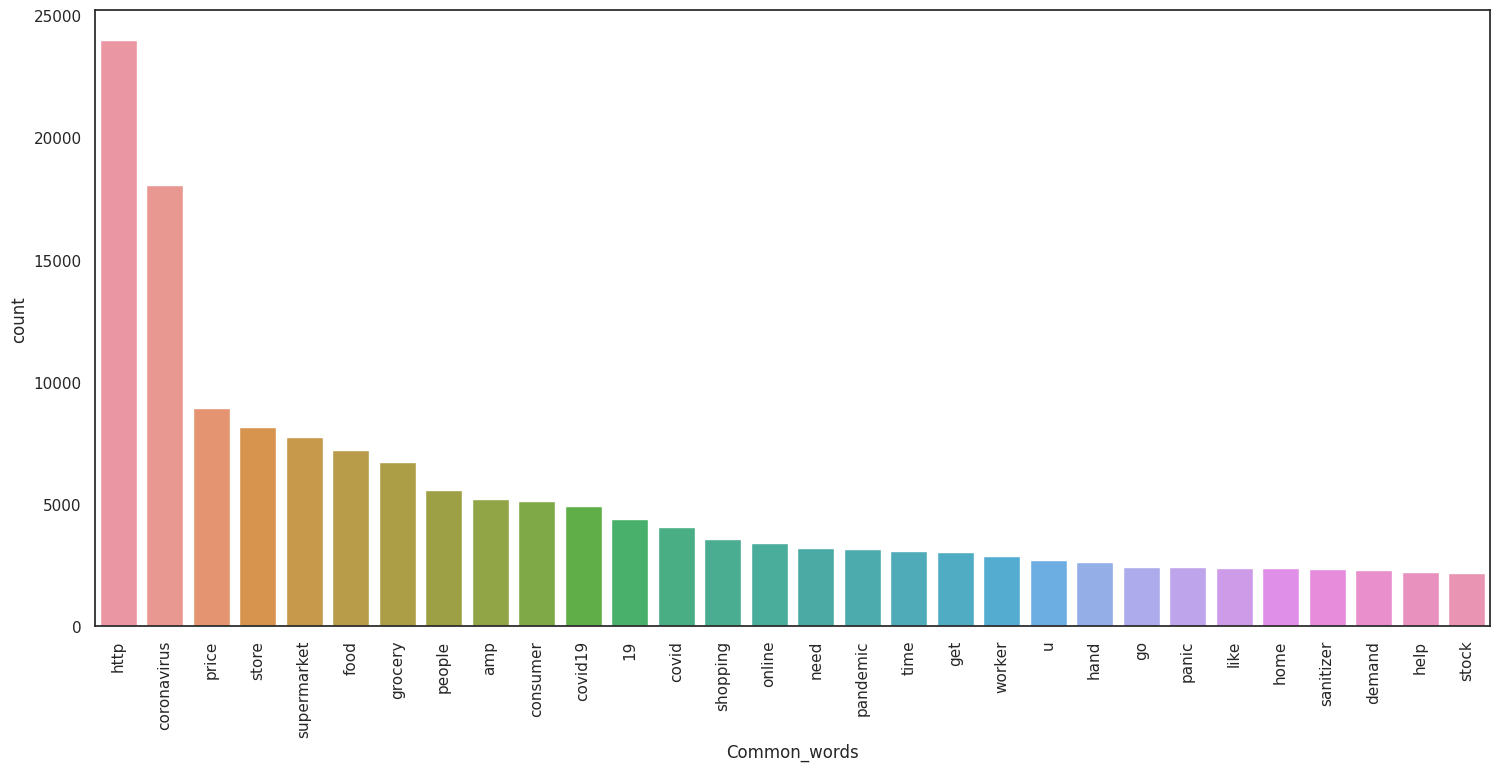

In [56]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(18,8))

# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)

# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [57]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

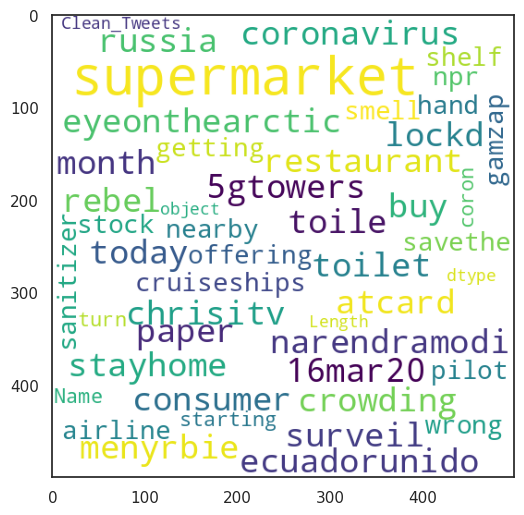

In [58]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `neutral`
df_wc = wc.generate(str(neutral['Clean_Tweets']))
plt.figure(figsize=(6,6))
plt.imshow(df_wc)



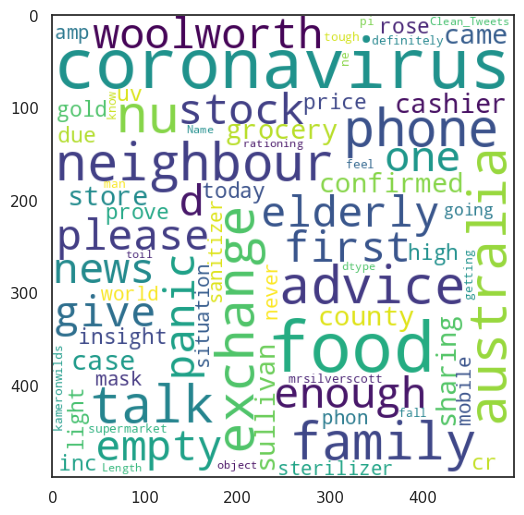

In [59]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `positive`
df_wc = wc.generate(str(positive['Clean_Tweets']))
plt.figure(figsize=(6,6))
plt.imshow(df_wc)

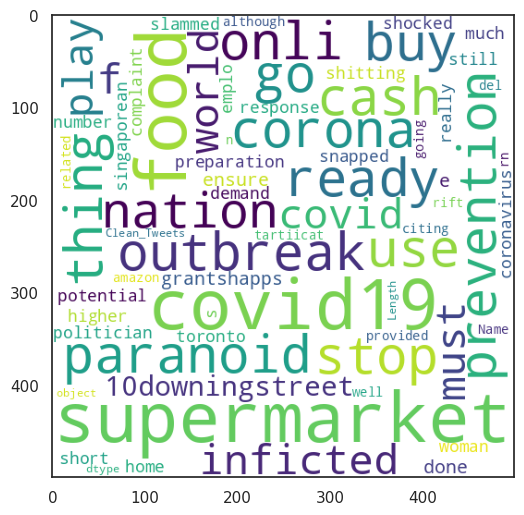

In [60]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `negative`
tweet_wc = wc.generate(str(negative['Clean_Tweets']))
plt.figure(figsize=(6,6))
plt.imshow(tweet_wc)

##6.**Feature Manipulation & Selection**

###  Data Splitting

In [61]:
#Assigning dependent and independent features
X= df['Clean_Tweets']
y=df['Sentiment']

In [62]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

### **What data splitting ratio have you used and why?**

**Data is divided into two categories: training data (80%) and test data (20%). More training data will enable the model to discover more patterns and trends in the data, which will improve predictions for upcoming or unforeseen data.**

In [63]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

## **7. Data Scaling**

**Which method have you used to scale you data and why?**

Since we are only analysing user sentiment in this instance, there is no need to scale the dataset in accordance with the Covid-19 scenario.

## **Handling Imbalanced Dataset**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   text_length    41157 non-null  int64 
 7   Clean_Tweets   41157 non-null  object
 8   fillin_list    41157 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


**Do you think the dataset is imbalanced? Explain Why.**

No, we decided to use only two columns for machine learning modelling, namely "Original Tweet" and "Sentiment," with an equal number of rows in each column.

## ***8. ML Model Implementation***

# **Count Vectorization (Bag of words)**

**# Vectorizing Text**

In [65]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [66]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [67]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

(32925, 19625)

In [68]:
# Use the Trained CountVectorizer 'bw' to transform the test data 'X_test' into a bag-of-words representation
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [69]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape

(8232, 19625)

## **ML Model - 1**

# **Logistic regression**
A statistical model called logistic regression uses odds against winning that range from 0 to 1 or a multiclass classification of the event that is a linear combination of one or more independent variables to predict the likelihood of an event occurring.

In [70]:
# Initializing the logistic regression model
logr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logr_Gscv = GridSearchCV(logr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logr_Gscv.fit(bw_X_train, y_train)


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [71]:
#predicted values
pred_logr_cv = logr_Gscv.predict(bw_X_test)

In [72]:
pred_logr_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [73]:
#Accuracy
accuracy_logr_cv = accuracy_score(y_test,pred_logr_cv)
print("Accuracy :",(accuracy_logr_cv))

Accuracy : 0.7871720116618076


In [74]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_logr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      3080
     Neutral       0.69      0.69      0.69      1543
    Positive       0.83      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

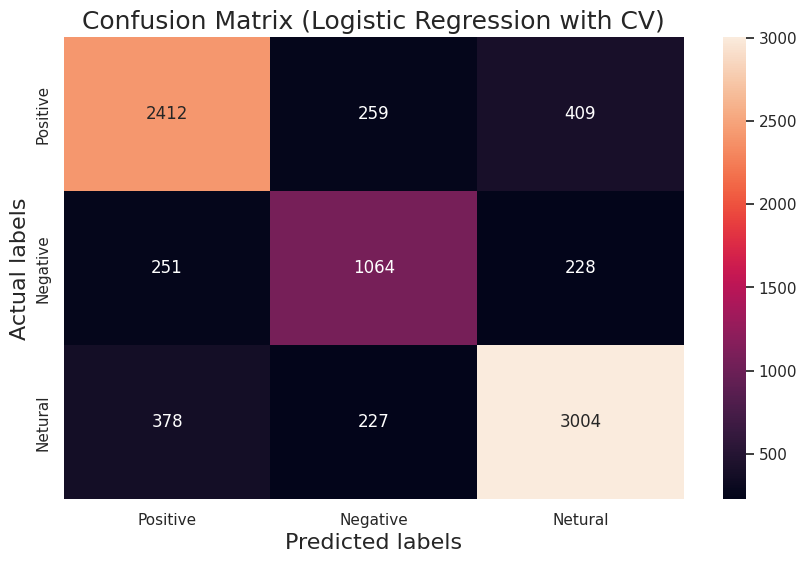

In [75]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_logr_cv))
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=16)
ax.set_ylabel('Actual labels', fontsize=16)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. **Explain the ML Model used and it's performance using Evaluation metric Score Chart**.

Here, the algorithm used Logistic Regression with a 78.7% accuracy rate and various evaluation metrics with labels for "Negative," "Neutral," and "Positive," such as increased precision, recall, and F1 scores.

**2.Which hyperparameter optimization technique have you used and why?**

Two hyperparameters for the logistic regression model—the regularisation penalty (L1 or L2) and the inverse of regularisation strength (C)—are tuned using GridSearchCV. Cross-validation is used to assess the model's performance, with the cv parameter set to 15.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%

### **ML Model - 2**

# **Decision Tree Classifier with CV**

A decision tree is a flowchart-like structure where each leaf node represents a class label or a numerical value (in the case of regression) and each internal node represents a test on an attribute (i.e., a feature).

In [76]:
# Initializing model
dtree_cv=DecisionTreeClassifier()

#fitting the data to model
dtree_cv.fit(bw_X_train,y_train)

#predreicted values
pred_dtree_cv=dtree_cv.predict(bw_X_test)

In [77]:
# Accuracy
cv_score_dtree_cv= cross_val_score(dtree_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dtree_cv)))

Accuracy: 0.6780258162490509


In [78]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dtree_cv))

              precision    recall  f1-score   support

    Negative       0.68      0.66      0.67      3080
     Neutral       0.60      0.65      0.63      1543
    Positive       0.74      0.73      0.74      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.68      0.68      8232
weighted avg       0.69      0.69      0.69      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

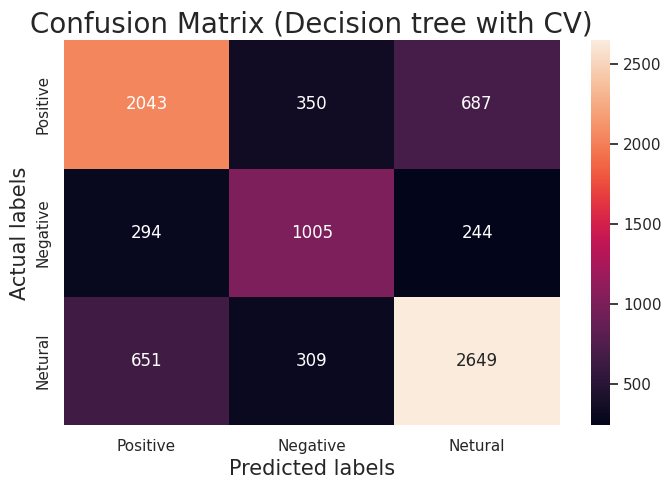

In [79]:
cf2= (confusion_matrix(y_test, pred_dtree_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Here, the algorithm utilised a Decision Tree with a 68% accuracy rate as well as various evaluation metrics with labels for "Negative," "Neutral," and "Positive" like precision, recall, and an elevated F1 score.

**2.Which hyperparameter optimization technique have you used and why?**

The decision tree model with five folds is cross-validated using the Scikit-Learn library. In order to determine the average accuracy score across all folds, the np.mean function is next used.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as shown in the following Evaluation metric Score Chart.

Accuracy:-69%

precision:-69%

recall: 69%

score for f1: 69%

### **ML Model - 3**

# **Navies Bayes**

A probabilistic machine learning algorithm called Naive Bayes is employed for classification issues. It is predicated on the Bayes theorem, which expresses the likelihood of a hypothesis (in this case, a class label), given some evidence (in this case, the input features.

Given the class label, Naive Bayes makes the assumption that the features are conditionally independent, which means that the presence or absence of one feature has no bearing on the likelihood of another feature.



In [80]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [81]:
# Apply both  type of navies one by one
mnb = MultinomialNB()
bnb = BernoulliNB()

##### **Multinomial Navies Bayes**
Multinomial Naive Bayes: Used for discrete data where the features represent counts or frequencies of occurrences (e.g., text data).

In [82]:
# Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation of the training data 'bw_X_train' and the corresponding labels 'y_train'
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)

0.684645286686103


In [83]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.70      3080
     Neutral       0.56      0.55      0.55      1543
    Positive       0.73      0.72      0.72      3609

    accuracy                           0.68      8232
   macro avg       0.66      0.66      0.66      8232
weighted avg       0.68      0.68      0.68      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

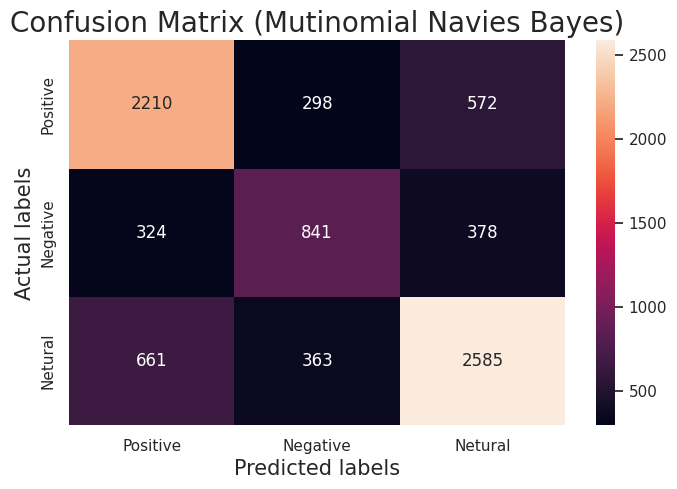

In [84]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The data was classified using the Multinominal Navies Bayes algorithm in the provided code, with an accuracy of 68%. Additionally, various evaluation metrics, including precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', and 'Positive'), and they demonstrated almost same  the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**



no, seen in above Evaluation metric Score Chart as follows

Accuracy:-66%

Precision:-66%

Recall:- 66%

f1-score:- 66%

## **Bernoulli Navies Bayes**

Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).


In [85]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

0.6925413022351797


In [86]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.69      0.61      1543
    Positive       0.76      0.69      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.67      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

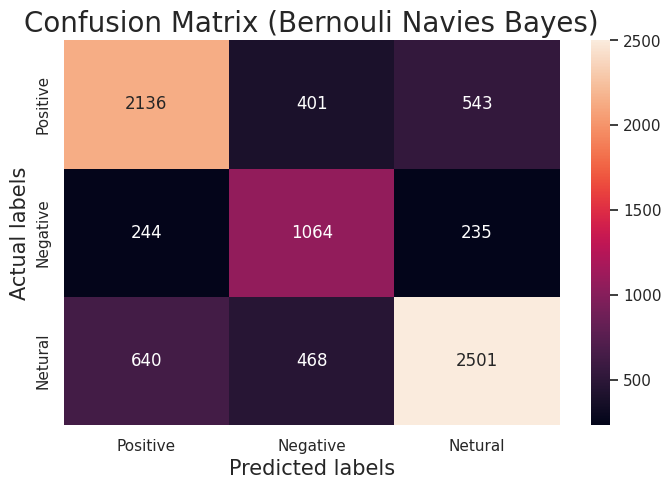

In [87]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In the code provided, the Bernouli  Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and  f1 score, were calculated for each  label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Answer Here.

 as seen in above Evaluation metric Score Chart as follows

Accuracy:-69%

Precision:-70%

Recall:- 69%

f1-score:- 70%

**ML Model - 4**

# **KNN(K-Nearest Neighbours)**

It is a straightforward algorithm that assigns the label of the majority class among the K instances that are closest to the input instance in the training data as the predicted label for the input instance.


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 1}
Mean cross-validation score: 0.37339407744874714


In [89]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)

In [90]:
pred_knn_cv

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [91]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.3780369290573372


In [92]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    Negative       0.59      0.31      0.40      3080
     Neutral       0.23      0.79      0.36      1543
    Positive       0.69      0.26      0.38      3609

    accuracy                           0.38      8232
   macro avg       0.50      0.45      0.38      8232
weighted avg       0.57      0.38      0.38      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

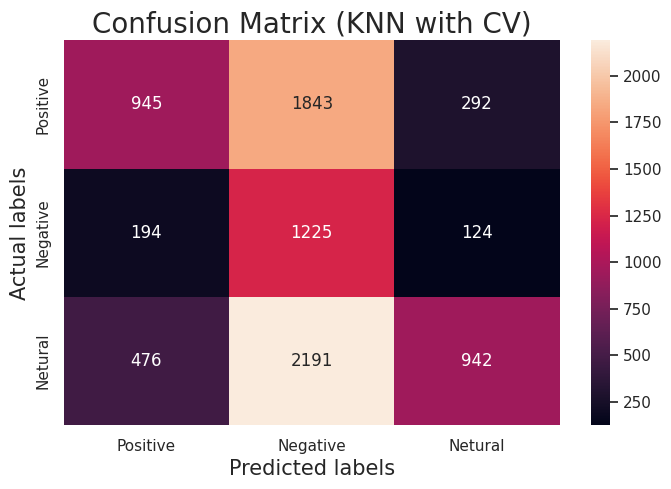

In [93]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

KNN algorithm was used to classify the data, resulting in an accuracy of 37%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive')

**2.Which hyperparameter optimization technique have you used and why?**

The range of possible values for n_neighbors is defined in the param_grid dictionary, which contains a list of integers from 1 to 9. GridSearchCV is then used to evaluate the performance of the KNN algorithm with each value of n_neighbors, using 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:- 38%

Precision:-50%


Recall:-45%

f1-score:38%

**ML Model - 5**

# **Support Vector Machine**
It is a supervised learning algorithm that works by finding the hyperplane that best separates the classes in the input data.

In multi-class classification problems, multiple hyperplanes are used to separate the classes. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest points from each class, known as support vectors.



In [94]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [95]:
pred_svm_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [96]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.766399416909621


In [97]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.78      0.75      0.77      3080
     Neutral       0.66      0.67      0.66      1543
    Positive       0.80      0.82      0.81      3609

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



<Axes: >

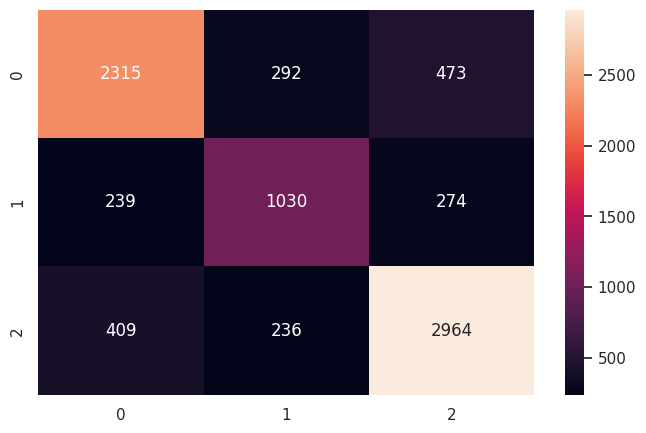

In [98]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The data was classified using the Support Vector Machine algorithm, which had a 76% accuracy rate. In addition, various evaluation metrics, including precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', and 'Positive'), and they showed improvement over the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**


**Answer Here.**
Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-77%

Precision:-77%

Recall:- 77%

f1-score:-77%

**ML Model - 6**

# **Random Forest**
On randomly chosen portions of the training data, Random Forest builds a number of decision trees. Because each tree is trained using a different subset of the features and data, less overfitting occurs and generalisation performance is enhanced.

During prediction, the input instance is passed through each decision tree, and the final prediction is determined by which prediction received the most votes from the individual trees.

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)


Accuracy_rf: 0.7538872691933917


In [100]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

    Negative       0.77      0.72      0.74      3080
     Neutral       0.67      0.71      0.69      1543
    Positive       0.78      0.80      0.79      3609

    accuracy                           0.75      8232
   macro avg       0.74      0.74      0.74      8232
weighted avg       0.75      0.75      0.75      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

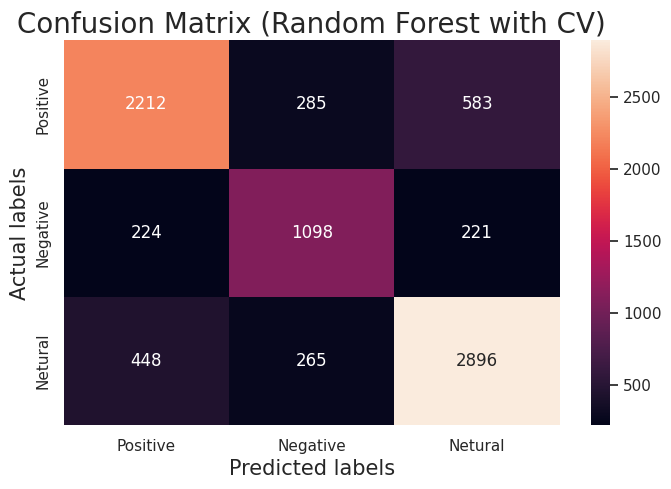

In [101]:
cf7= (confusion_matrix(y_test,y_pred_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Random Forest  algorithm was used to classify the data, resulting in an accuracy of 75%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly  improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The Random Forest Classifier has been optimised with hyperparameters. In the absence of explicit hyperparameter tuning, the classifier has been initialised with the default values for the hyperparameters n_estimators=100 and random_state=42.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-75%

Recall:- 75%

f1-score:-75%

**ML Model - 7**

# **Stochastic Gradient Descent**
In SGD, the gradient is calculated on a randomly chosen subset (or mini-batch) of the training data rather than the entire training set. This speeds up convergence and lowers the algorithm's computational cost.

After each mini-batch, the model's parameters are updated, and the process is repeated until convergence or a predetermined number of iterations has been reached.

SGD can handle large amounts of data effectively and converge more quickly than traditional Gradient Descent, making it useful for large datasets and high-dimensional data.





In [104]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_sgd = sgd_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd= accuracy_score(y_test, y_pred_sgd)
print('Accuracy_sgd:', accuracy_sgd)


Accuracy_sgd: 0.7978620019436345


In [105]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      3080
     Neutral       0.69      0.72      0.70      1543
    Positive       0.84      0.83      0.84      3609

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

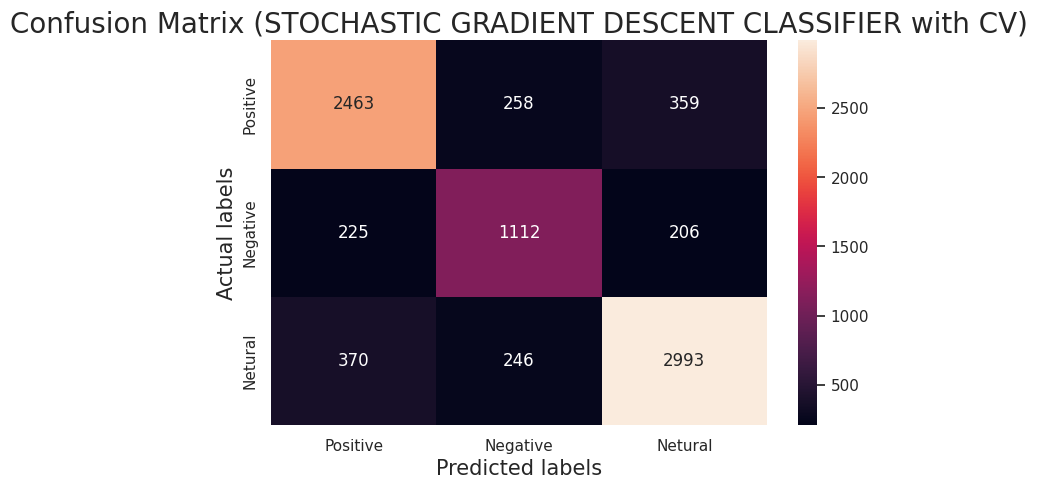

In [106]:
cf8= (confusion_matrix(y_test,y_pred_sgd))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf8, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (STOCHASTIC GRADIENT DESCENT CLASSIFIER with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The data was classified using the stochastic gradient descent algorithm, which had an accuracy rate of 79%. Additionally, various evaluation metrics that were calculated for each label ('Negative', 'Neutral', and 'Positive') and significantly improved over the baseline model included precision, recall, and f1 score.

SGD can handle large amounts of data effectively and converge more quickly than traditional Gradient Descent, making it useful for large datasets and high-dimensional data.



**2.Which hyperparameter optimization technique have you used and why?**

In the absence of explicit hyperparameter tuning, the classifier has been instantiated with the default values for the hyperparameters loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

 as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Stochastic Gradient Descent algorthim used for model deployement as Sentiment Analysis using Vectorization techinque Count Vectorizer(Bags of Word).

Accuracy:-80%

Precision:-80%

Recall:- 80%

f1-score:-80%

### **TF-IDF VECTORIZATION(Term Frequency-Inverse Document Frequency**)

TF-IDF is calculated as the product of two values: term frequency (TF) and Inverse document frequency (IDF).

The term frequency (TF) measures how frequently a term appears in a document.

The inverse document frequency (IDF) measures how important a term is in the entire corpus, by penalizing the terms that appear in many documents.

**Data Splitting**

In [108]:
X=df['Clean_Tweets']
y=df['Sentiment']

In [109]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [110]:
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

## **# Vectorizing Text**

In [111]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [112]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [113]:
tv_X_train.shape

(32925, 19625)

In [114]:
tv_X_test=tv.transform(X_test.astype(str).str.strip())


**MODEL - 1 (TF-IDF)**

# **Logistic Regression**

In [115]:
# Initializing model
logr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logr_tv_Gcv=GridSearchCV(logr_tv,parameters,cv=5)

#fitting the data to model
logr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [116]:
#predicted values
pred_logr_tv_Gcv = logr_tv_Gcv.predict(tv_X_test)

In [117]:
#Accuracy
accuracy_logr_Gcv = accuracy_score(y_test,pred_logr_tv_Gcv)
print("Accuracy :",(accuracy_logr_Gcv))

Accuracy : 0.7855928085519922


In [118]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_logr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79      3080
     Neutral       0.69      0.66      0.67      1543
    Positive       0.81      0.84      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.76      8232
weighted avg       0.78      0.79      0.78      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

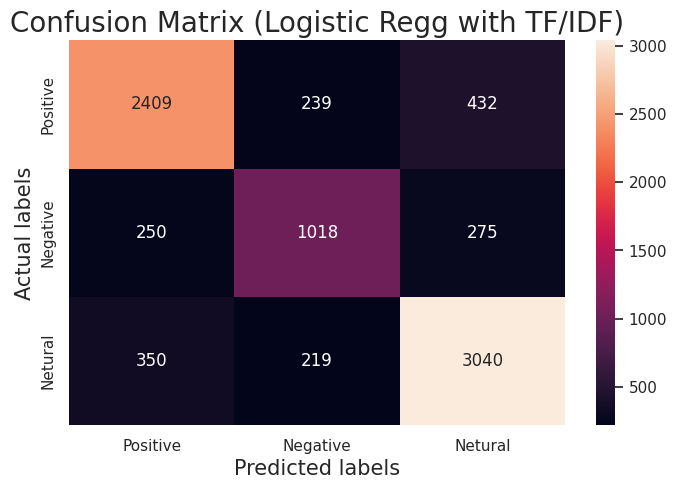

In [119]:
cf1a= (confusion_matrix(y_test,pred_logr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The data were classified using the Logistic Regression algorithm, which had a 78% accuracy rate. Additionally, various evaluation metrics that were calculated for each label ('Negative', 'Neutral', and 'Positive') and significantly improved over the baseline model included precision, recall, and f1 score.



**2.Which hyperparameter optimization technique have you used and why?**

The "parameters" dictionary specifies the values of the regularisation parameter C and the penalty term (l1 or l2), which together define the hyperparameter space. Additionally, GridSearchCV works to avoid overfitting and guarantees that the model generalises well to new data.


**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Logistic Regression algorthim used for model deployement as Sentiment Analysis using Vectorization techinque TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-79%

Precision:-79%

**MODEL - 2 (TF-IDF)**

# **Decision Tree**

In [120]:
# Initializing model
dtree_tv=DecisionTreeClassifier()

#fitting the data to model
dtree_tv.fit(tv_X_train,y_train)

#prediction
pred_dtree_tv=dtree_tv.predict(tv_X_test)

In [121]:
pred_dtree_tv

array(['Neutral', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Neutral'], dtype=object)

In [124]:
# Accuracy
cv_score_dtree_tv= cross_val_score(dtree_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dtree_tv)))


Accuracy: 0.604343204252088


In [126]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dtree_tv))

              precision    recall  f1-score   support

    Negative       0.63      0.61      0.62      3080
     Neutral       0.47      0.56      0.52      1543
    Positive       0.70      0.66      0.68      3609

    accuracy                           0.63      8232
   macro avg       0.60      0.61      0.61      8232
weighted avg       0.63      0.63      0.63      8232



In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dtree_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



The classification of the data by the Decision Tree algorithm had an accuracy of 60%. Additionally, various evaluation metrics that were calculated for each label ('Negative', 'Neutral', and 'Positive') and significantly improved over the baseline model included precision, recall, and f1 score.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**


**Answer Here.**

yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is  better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-63%

Precision:-63%

Recall:- 63%

f1-score:-63%

**MODEL - 3 (TF-IDF)**

# **Navies Bayes**

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
mnb = MultinomialNB()
bnb = BernoulliNB()

**Multinomial Navies Bayes**

In [129]:
mnb.fit(tv_X_train,y_train)
y_pred2_mnb_tv = mnb.predict(tv_X_test)
accuracy_mnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred2_mnb_tv))

0.6627793974732751


In [130]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2_mnb_tv))


              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70      3080
     Neutral       0.78      0.14      0.24      1543
    Positive       0.64      0.84      0.73      3609

    accuracy                           0.66      8232
   macro avg       0.70      0.57      0.56      8232
weighted avg       0.68      0.66      0.63      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

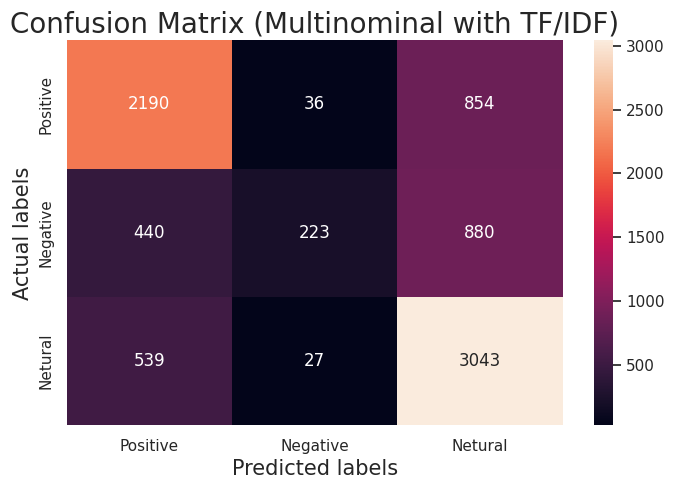

In [131]:
cf3a= (confusion_matrix(y_test,y_pred2_mnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Multinominal with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Multinomial Navies Bayes was used to classify the data, resulting in an accuracy of 66%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

no, as seen in above Evaluation metric Score Chart as follows

Accuracy:-66%

Precision:-68%

Recall:- 66%

f1-score:-63%

**Bernoulli Navies Bayes**

In [132]:
bnb.fit(tv_X_train,y_train)
y_pred3_bnb_tv = bnb.predict(tv_X_test)
accuracy_bnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3_bnb_tv))

0.6925413022351797


In [133]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3_bnb_tv))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.69      0.61      1543
    Positive       0.76      0.69      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.67      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0.5, 0, 'Positive'), Text(1.5, 0, 'Negative'), Text(2.5, 0, 'Netural')]

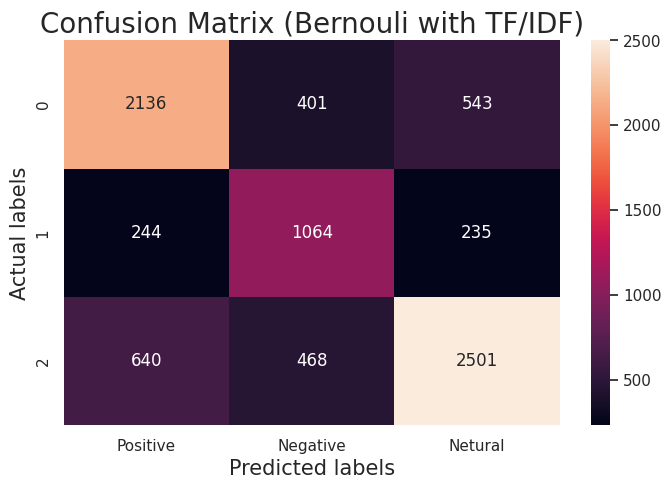

In [134]:
cf4a= (confusion_matrix(y_test,y_pred3_bnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Bernoulli Navies Bayes was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

as seen in above Evaluation metric Score Chart as follows
Accuracy:-69%

Precision:-70%

Recall:- 70%

f1-score:-70%

**MODEL - 4 (TF-IDF)**

# **KNN(K-Nearest Neighbours)**

In [135]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [137]:
#predicted values
pred_knn_tv = knn_tv.predict(tv_X_test)

In [138]:
pred_knn_tv

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [141]:
# Accuracy
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))


Accuracy : 0.2755102040816326


In [139]:

# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

              precision    recall  f1-score   support

    Negative       0.82      0.12      0.21      3080
     Neutral       0.20      0.95      0.33      1543
    Positive       0.85      0.12      0.20      3609

    accuracy                           0.28      8232
   macro avg       0.62      0.40      0.25      8232
weighted avg       0.72      0.28      0.23      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

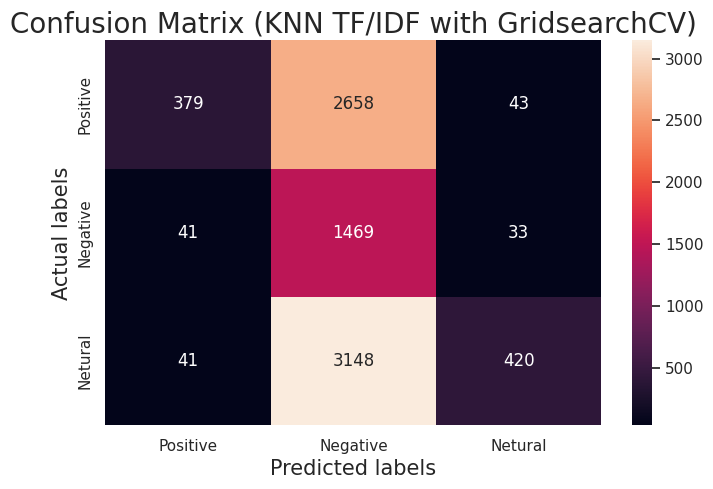

In [140]:
cf4a= (confusion_matrix(y_test,pred_knn_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

KNN(K-Nearest Neighbours)was used to classify the data, resulting in an accuracy of 27%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and worst model as compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

Hyperparameters using cross-validation, In this case, the hyperparameter space is defined by the "param" dictionary, which specifies the number of neighbors to consider (n_neighbors) ranging from 1 to 8.

The reason for using GridSearchCV in this case is to find the optimal number of neighbors (n_neighbors) for the KNN classifier.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-28%

Precision:-72%

Recall:- 28%

f1-score:-23%

**MODEL - 5 (TF-IDF)**

# **Random Forest**

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_rf_tv = rf_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_tv_rf = (y_pred_rf_tv == y_test).mean()
print('Accuracy_tv_rf:', accuracy_tv_rf)

Accuracy_tv_rf: 0.7292274052478134


In [149]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf_tv))

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.73      3080
     Neutral       0.65      0.62      0.63      1543
    Positive       0.75      0.79      0.77      3609

    accuracy                           0.73      8232
   macro avg       0.71      0.71      0.71      8232
weighted avg       0.73      0.73      0.73      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

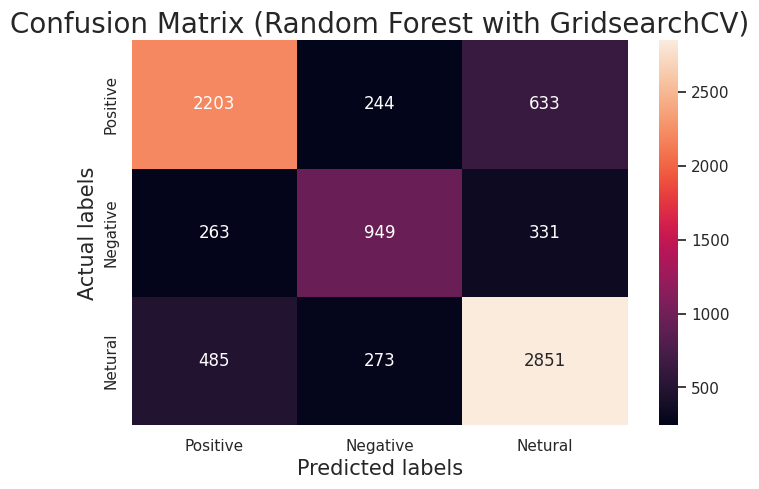

In [150]:
cf5a= (confusion_matrix(y_test,y_pred_rf_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Random Forest was used to classify the data, resulting in an accuracy of 72%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The Random Forest Classifier has been initialized with some default values for the hyperparameters, including n_estimators=100 and random_state=42.In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-73%

Precision:-73%

Recall:- 73%

f1-score:-73%

**MODEL - 6 (TF-IDF)**

# **Stochastic Gradient Descent**

In [142]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_sgd_tv = sgd_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd_tv= accuracy_score(y_test, y_pred_sgd_tv)
print('Accuracy:', accuracy_sgd_tv)


Accuracy: 0.7645772594752187


In [143]:

# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd_tv ))

              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78      3080
     Neutral       0.77      0.46      0.57      1543
    Positive       0.77      0.86      0.81      3609

    accuracy                           0.76      8232
   macro avg       0.76      0.71      0.72      8232
weighted avg       0.76      0.76      0.76      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

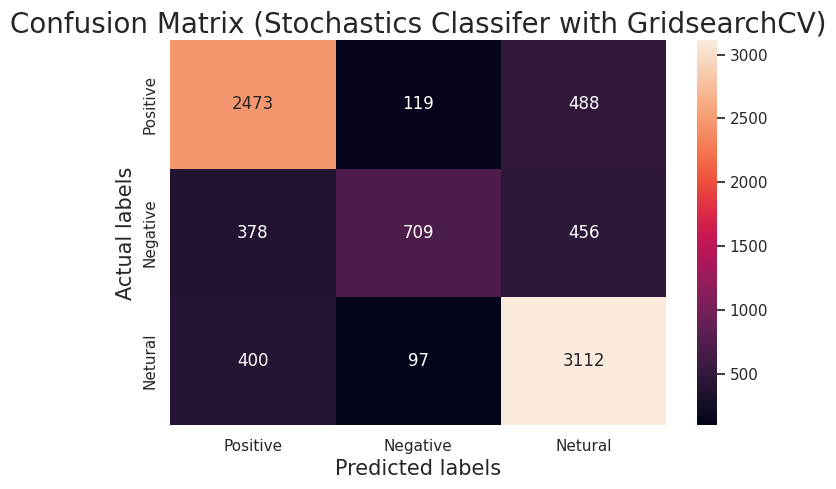

In [144]:
cf6a= (confusion_matrix(y_test,y_pred_sgd_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Stochastics Classifer with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Stochastic Gradient Descent was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The Stochastic Gradient Descent (SGD) Classifier has been initialized with some default values for the hyperparameters, including loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000. In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

no, as seen in above Evaluation metric Score Chart as follows accuracy .

Accuracy:-76%

Precision:-76%

Recall:- 76%

f1-score:-76%

**MODEL - 7 (TF-IDF)**

# **Support Vector Machine**

In [145]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(tv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(tv_X_test)

In [146]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7707725947521866


In [147]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.78      3080
     Neutral       0.72      0.55      0.62      1543
    Positive       0.79      0.84      0.81      3609

    accuracy                           0.77      8232
   macro avg       0.76      0.73      0.74      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

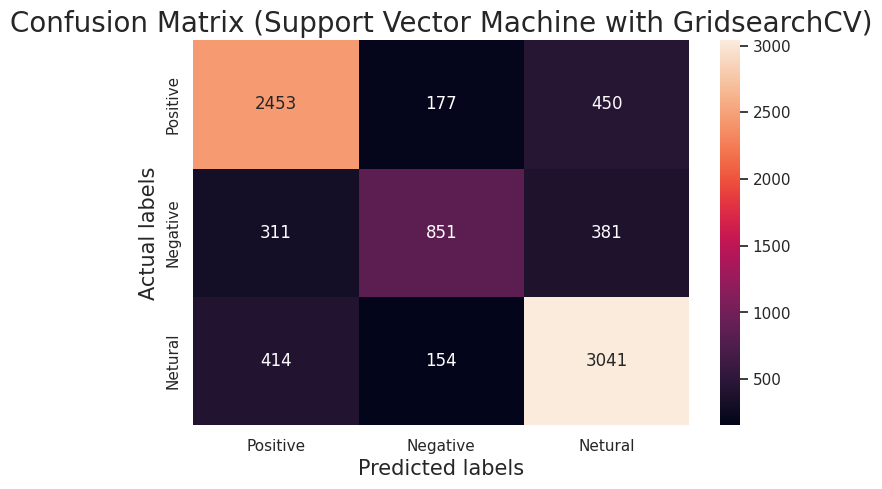

In [148]:
cf7a= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Support Vector Machine with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



**Answer Here.**
Support Vector Machine was used to classify the data, resulting in an accuracy of 77%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**
Ye as seen in above Evaluation metric Score Chart as follows

Accuracy:-77%

Precision:-77%

Recall:- 77%

f1-score:-77%

# **Report on Classification Metrics** #

By comparing the predicted labels to the actual labels, classification metrics are used to assess the effectiveness of a classification model. When assessing sentiment analysis models, accuracy can be helpful, especially if the classes are balanced.

Accuracy: The percentage of labels that were correctly predicted out of all the samples. Calculation: **(TP+TN)/(TP+TN+FP+FN)**


Where

**TP**:-True Positive

**TN**:-True Negative

**FP**:-False Positive

**FN**:-False Negative





In [153]:
acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier','Multinomial Navies Bayes','Bernoulli Navies Bayes','Stochastic Gradient Descent','Random Forest'],
        'Count Vector':  [accuracy_logr_cv,np.mean(cv_score_dtree_cv),accuracy_KNN,accuracy_svc,accuracy_bnb,accuracy_mnb,accuracy_sgd,accuracy_rf],
        'Tf/idf Vector': [accuracy_logr_Gcv,np.mean(cv_score_dtree_tv),accuracy_KNN_tv,accuracy_svc,accuracy_mnb_tv,accuracy_bnb_tv,accuracy_sgd_tv,accuracy_tv_rf]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])
cv_score_table

,Model,Count Vector,Tf/idf Vector
0,Logistic Regression with GridserachCV,0.787172,0.785593
1,Decision Tree Classifier,0.678026,0.604343
2,K-Nearest-Neighbours Classifier,0.378037,0.275510
3,Support-Vector-Machine Classifier,0.770773,0.770773
4,Multinomial Navies Bayes,0.692541,0.692541
5,Bernoulli Navies Bayes,0.684645,0.692541
6,Stochastic Gradient Descent,0.797862,0.764577
7,Random Forest,0.753887,0.729227


**1. Which ML model did you choose from the above created models as your final prediction model and why?**

**Answer Here.**

According to the metrics chart above, the stochastic gradient descent model using the count vectorization technique performed better, achieving an accuracy level of 79.78%, than the logistic regression model using Tf/idf vectorization, which only managed to reach 76.45%. The **Stochastic Gradient Descent model** will therefore be implemented using the Count Vectorization Technique.

**2.Explain the model which you have used and the feature importance using any model explainability tool?**

**Answer Here.**

1-The Stochastic Gradient Descent (SGD) classifier is the model that we have used. It is a linear classifier that updates the model parameters using gradient descent optimisation.  The Count Vectorization Technique creates a document-term matrix, where each row represents a document and each column represents a word from the vocabulary, by counting the number of times each word appears in the text data.

2. The scikit-learn library's Permutation Importance technique can be used to comprehend the feature importance. Using a random permutation of a feature's value and observation of the impact on the model's performance, the permutation importance technique analyses the results.

# **Conclusion**

1. For both the Count Vector and TF ID Vectorization techniques, we applied 8 models, including Logistic Regression with Grid Search CV, Decision Tree Classifier, Stochastic Gradient Descent, KNN, SVM, Multinomial Navies Bayes, and Bernoulli Navies Bayes Classifier.performance.


2. We come to the conclusion that the machine produces the most accurate results with the stochastic gradient descent (count vectorizer) model, which has an accuracy of 79.78%, and the logistic regression(count vectorizer) with anaccuracy of 78.71% with grid search CV (TF/ID vectorizer) model, which has an accuracy of 78.55%.

3.Repeating the analysis in the future and comparing it to the current sentimental analysis will allow us to determine the impact of the initiatives on the ground.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***